In [1]:
import os
import tempfile
from pdf2image import convert_from_path
from PIL import Image 
import pytesseract
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import re
from PyPDF2 import PdfFileReader
import warnings

In [2]:
pdf = PdfFileReader(open('sapinv2.pdf','rb'))
noofpages = pdf.getNumPages()
noofpages

2

In [3]:
i=0
# filename = 'sapinv2_'+str(i)+'.jpg'
# filename1= 'sapinv2.pdf'
path=r'D:\Invoice v2'

ref_point = []


In [4]:
filename_list=[]
if noofpages>0:
    for i in range(0,noofpages):
        filename_list.append('sapinv2_'+str(i)+'.jpg')
filename_list

['sapinv2_0.jpg', 'sapinv2_1.jpg']

In [5]:
filename_list

['sapinv2_0.jpg', 'sapinv2_1.jpg']

In [6]:
import numpy as np
import PIL

#list_im = ['sapinv2_0.jpg', 'sapinv2_1.jpg']
imgs    = [ PIL.Image.open(i) for i in filename_list ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
# imgs_comb = PIL.Image.fromarray( imgs_comb)
# imgs_comb.save( 'sapmerge.jpg' )    

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( 'sap_invoice_merge.jpg' )

In [7]:
text3=''
for i in filename_list:
    
    value=Image.open(i) 
    text2 = pytesseract.image_to_string(value, config='') 
    print("Text present in images:\n\n",text2)
    text3=text3+text2

Text present in images:

 Purchase order
Vendor 3 Org
115 115 PO number/date

phoenix AZ 85001 4500000147 / 12/31/2019
Contact person/Telephone

Group 002/770 840 9421
Our fax number

770 840 9000

 

 

 

Your vendor number with us

17100086

Please deliver to:

Plant 1710 - Address Name 1
3475 Deer Creek

Palo Alto CA 94304-1355

Currency USD

 

 

Item Material Description
Order qty. Unit Price per unit Net value
00010 250 Spray Foam Insulation
10 each
Deliv. date Day 12/31/2019
Manual Gross Pri 30.00 USD 1 EA 300.00
Gross Value 30.00 USD 1 EA 300.00
Sum Surcharges/D 0.00 1 EA 0.00
Net Value 30.00 USD 1 EA 300.00
Net Value 2 (inc 30.00 USD 1 EA 300.00
00020 252 Vaseline Lotion
12 Bottle
Deliv. date Day 12/31/2019
Manual Gross Pri 20.00 USD 1 BT 240.00
Gross Value 20.00 USD 1 BT 240.00
Sum Surcharges/D 0.00 1 BT 0.00
Net Value 20.00 USD 1 BT 240.00
Net Value 2 (inc 20.00 USD 1 BT 240.00
Text present in images:

 Vendor 3 Org
115 115
phoenix AZ 85001

PO number/date
4500000147 / 12/

In [8]:
file1 = 'sap_invoice_merge.jpg'

In [9]:

def getattributes(fieldname):
    
    def shape_selection(event, x, y, flags, param): 
        global ref_point,file1
        if event == cv2.EVENT_LBUTTONDOWN: 
            ref_point = [(x, y)] 

        # check to see if the left mouse button was released 
        elif event == cv2.EVENT_LBUTTONUP: 
            # record the ending (x, y) coordinates and indicate that 
            # the cropping operation is finished 
            ref_point.append((x, y)) 

            # draw a rectangle around the region of interest 
            cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2) 
            cv2.imshow(fieldname, image) 

        
    image1 = cv2.imread(file1)
    #image=cv2.resize(image1,(1000,1000))
    W = 1000
    height, width, depth = image1.shape
    imgScale = W/width
    newX,newY = image1.shape[1]*imgScale, image1.shape[0]*imgScale
    image = cv2.resize(image1,(int(newX),int(newY)))
    #cv2.imshow('',image)
    clone = image.copy() 
    cv2.namedWindow(fieldname,cv2.WINDOW_NORMAL) 
    cv2.setMouseCallback(fieldname, shape_selection) 

    while True: 
        # display the image and wait for a keypress 
        cv2.imshow(fieldname, image) 
        key = cv2.waitKey(1)

        # press 'r' to reset the window 
        if key == ord("r"): 
            image = clone.copy() 

        # if the 'c' key is pressed, break from the loop 
        elif key == ord("c"): 
            break

    if len(ref_point) == 2: 
        crop_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]: 
                                                               ref_point[1][0]] 
        cv2.imshow("crop_img", crop_img) 
        cv2.waitKey(0) 
    
    cv2.destroyAllWindows()  
    return(ref_point)




In [10]:

fields = ['Purchasing Document','Document Date','Vendor','Description']


In [11]:

asd = {}
for x in fields:
    ref = getattributes(x)
    h = ref[0][0]-ref[1][0]
    w = ref[0][1]-ref[1][1]
    asd[x] = [ref[0],h,w,ref]

In [12]:
asd

{'Purchasing Document': [(516, 285), -126, -28, [(516, 285), (642, 313)]],
 'Document Date': [(667, 265), -138, -57, [(667, 265), (805, 322)]],
 'Vendor': [(71, 505), -118, -33, [(71, 505), (189, 538)]],
 'Description': [(19, 760), -966, -1546, [(19, 760), (985, 2306)]]}

In [13]:
myfile = open('image_coordinates.txt', 'w')
myfile.writelines(str(asd))
myfile.close()

In [14]:
image = cv2.imread(file1)


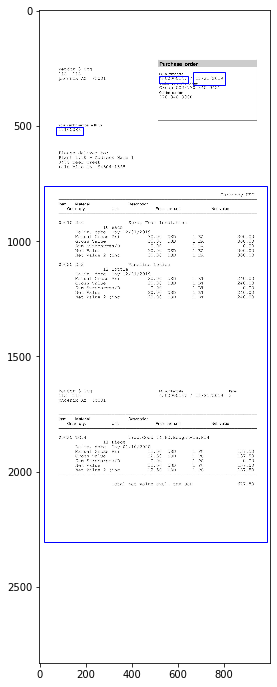

In [15]:
image1 = cv2.imread(file1)
    #image=cv2.resize(image1,(1000,1000))
W = 1000
height, width, depth = image1.shape
imgScale = W/width
newX,newY = image1.shape[1]*imgScale, image1.shape[0]*imgScale
image = cv2.resize(image1,(int(newX),int(newY)))

fig,ax = plt.subplots(1,figsize=(12,12))
ax.imshow(image)
for x in asd.keys():
    ax.add_patch(patches.Rectangle(asd[x][0],width = abs(asd[x][1]),height = abs(asd[x][2]),facecolor='None',edgecolor='b'))


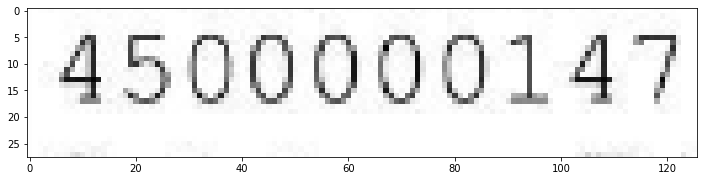

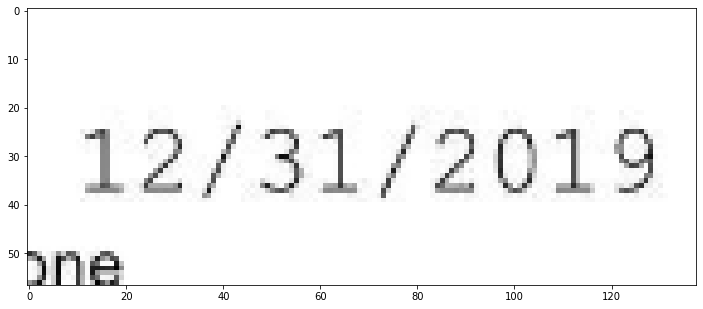

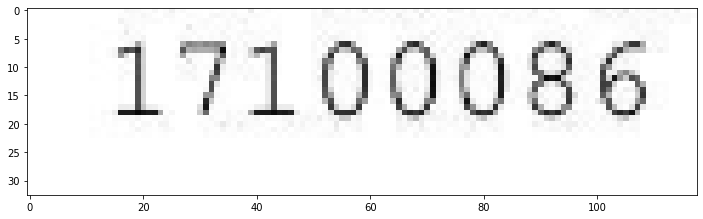

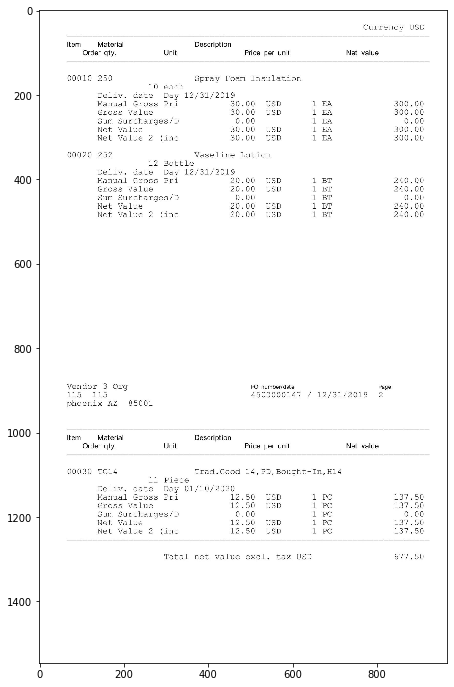

In [16]:
for x in asd.keys():
    plt.figure(figsize=(12,12))
    ref_point = asd[x][3]
    crop_img = image[ref_point[0][1]:ref_point[1][1], ref_point[0][0]: ref_point[1][0]] 
    plt.imshow(crop_img)
    strings_image = pytesseract.image_to_string(crop_img)

In [254]:
for x in asd.keys():
    #plt.figure()
    ref_point = asd[x][3]
    crop_img = image[ref_point[0][1]:ref_point[1][1], ref_point[0][0]: 
                                                           ref_point[1][0]] 
    
    text = pytesseract.image_to_string(crop_img, config='')
    #print ("..\n",text)
    text = text + " \n....\n"
    print (text)
        
    myfile = open('image_text.txt', 'a')
    myfile.writelines(text)
    myfile.close()
    



4500000147 
....

12/31/2019

se 
....

17100086 
....

Currency USD

 

 

 

 

 

Item Material Description
Order qty. Unit Price per unit Net value
00010 250 Spray Foam Insulation
10 each
Deliv. date Day 12/31/2019
Manual Gross Pri 30.00 USD 1 EA 300.00
Gross Value 30.00 USD 1 EA 300.00
Sum Surcharges/D 0.00 1 EA 0.00
Net Value 30.00 USD 1 EA 300.00
Net Value 2 (inc 30.00 USD 1 EA 300.00
00020 252 Vaseline Lotion
12 Bottle
Deliv. date Day 12/31/2019
Manual Gross Pri 20.00 USD 1 BT 240.00
Gross Value 20.00 USD 1 BT 240.00
Sum Surcharges/D 0.00 i Bf 0.00
Net Value 20.00 USD 1 Br 240.00
Net Value 2 (inc 20.00 USD 1 BT 240.00
Vendor 3 Org PO number/date Page
115 115 4500000147 / 12/31/2019 2
phoenix AZ 85001
Item Material Description
Order qty. Unit Price per unit Net value
00030 TG14 Trad.Good 14, PD,Bought-In,H14
11 Piece
Deliv. date Day 01/10/2020
Manual Gross Pri 12.50 USD 1, FC 137.50
Gross Value 12.50 USD 1 PC 137.50
Sum Surcharges/D 0.00 L Fe 0.00
Net Value 12.50 USD 1 PC 137.50

In [18]:
# fields2= ['Description']

In [19]:
# ref=[]


# asd2 = {}

# for x in fields2:
#     ref = getattributes(x)
#     h = ref[0][0]-ref[1][0]
#     w = ref[0][1]-ref[1][1]
#     asd2[x] = [ref[0],h,w,ref]


In [21]:
# asd2

In [22]:

# for x in asd2.keys():
#     #plt.figure()
#     ref_point = asd2[x][3]
#     crop_img = image[ref_point[0][1]:ref_point[1][1], ref_point[0][0]: 
#                                                            ref_point[1][0]] 
    
#     text = pytesseract.image_to_string(crop_img, config='')
#     #print ("..\n",text)
#     text = text + " \n....\n"
#     print (text)
        
#     myfile = open('image_text2.txt', 'a')
#     myfile.writelines(text)
#     myfile.close()
    



In [23]:
def Open_text():
    fi = open("image_text.txt").read()
    x2 = fi.split('\n')
    return(x2)

In [24]:
x2=Open_text()
x2

['4500000147 ',
 '....',
 '12/31/2019 ',
 '....',
 '17100086 ',
 '....',
 'Currency USD',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 'Item Material Description',
 'Order qty. Unit Price per unit Net value',
 '00010 250 Spray Foam Insulation',
 '10 each',
 'Deliv. date Day 12/31/2019',
 'Manual Gross Pri 30.00 USD 1 EA 300.00',
 'Gross Value 30.00 USD 1 EA 300.00',
 'Sum Surcharges/D 0.00 1 EA 0.00',
 'Net Value 30.00 USD 1 EA 300.00',
 'Net Value 2 (inc 30.00 USD 1 EA 300.00',
 '00020 252 Vaseline Lotion',
 '12 Bottle',
 'Deliv. date Day 12/31/2019',
 'Manual Gross Pri 20.00 USD 1 BT 240.00',
 'Gross Value 20.00 USD 1 BT 240.00',
 'Sum Surcharges/D 0.00 i Bf 0.00',
 'Net Value 20.00 USD 1 Br 240.00',
 'Net Value 2 (inc 20.00 USD 1 BT 240.00',
 'Vendor 3 Org PO number/date Page',
 '115 115 4500000147 / 12/31/2019 2',
 'phoenix AZ 85001',
 'Item Material Description',
 'Order qty. Unit Price per unit Net value',
 '00030 TG14 Trad.Good 14, PD,Bought-In,H14',
 '11 Piece',

In [25]:
new=x2
new

['4500000147 ',
 '....',
 '12/31/2019 ',
 '....',
 '17100086 ',
 '....',
 'Currency USD',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 'Item Material Description',
 'Order qty. Unit Price per unit Net value',
 '00010 250 Spray Foam Insulation',
 '10 each',
 'Deliv. date Day 12/31/2019',
 'Manual Gross Pri 30.00 USD 1 EA 300.00',
 'Gross Value 30.00 USD 1 EA 300.00',
 'Sum Surcharges/D 0.00 1 EA 0.00',
 'Net Value 30.00 USD 1 EA 300.00',
 'Net Value 2 (inc 30.00 USD 1 EA 300.00',
 '00020 252 Vaseline Lotion',
 '12 Bottle',
 'Deliv. date Day 12/31/2019',
 'Manual Gross Pri 20.00 USD 1 BT 240.00',
 'Gross Value 20.00 USD 1 BT 240.00',
 'Sum Surcharges/D 0.00 i Bf 0.00',
 'Net Value 20.00 USD 1 Br 240.00',
 'Net Value 2 (inc 20.00 USD 1 BT 240.00',
 'Vendor 3 Org PO number/date Page',
 '115 115 4500000147 / 12/31/2019 2',
 'phoenix AZ 85001',
 'Item Material Description',
 'Order qty. Unit Price per unit Net value',
 '00030 TG14 Trad.Good 14, PD,Bought-In,H14',
 '11 Piece',

In [26]:

for i in new:
    rt1=i.lower()
    rt = ''.join(rt1.split())
    
    print(rt)
    if 'totalnetvalueexcl.taxusd' in rt:
        i=re.sub('Total net value excl. tax USD ','totalnetvalueexcl.taxusd',i,flags=re.IGNORECASE)
        ser = re.compile(re.escape("totalnetvalueexcl.taxusd"),re.IGNORECASE)       
        bill = ser.sub("",i)


4500000147
....
12/31/2019
....
17100086
....
currencyusd











itemmaterialdescription
orderqty.unitpriceperunitnetvalue
00010250sprayfoaminsulation
10each
deliv.dateday12/31/2019
manualgrosspri30.00usd1ea300.00
grossvalue30.00usd1ea300.00
sumsurcharges/d0.001ea0.00
netvalue30.00usd1ea300.00
netvalue2(inc30.00usd1ea300.00
00020252vaselinelotion
12bottle
deliv.dateday12/31/2019
manualgrosspri20.00usd1bt240.00
grossvalue20.00usd1bt240.00
sumsurcharges/d0.00ibf0.00
netvalue20.00usd1br240.00
netvalue2(inc20.00usd1bt240.00
vendor3orgponumber/datepage
1151154500000147/12/31/20192
phoenixaz85001
itemmaterialdescription
orderqty.unitpriceperunitnetvalue
00030tg14trad.good14,pd,bought-in,h14
11piece
deliv.dateday01/10/2020
manualgrosspri12.50usd1,fc137.50
grossvalue12.50usd1pc137.50
sumsurcharges/d0.00lfe0.00
netvalue12.50usd1pc137.50
netvalue2(inc12.50usd1pc137.50
totalnetvalueexcl.taxusd677.50
....
4500000147
....
12/31/2019

se
....
17100086
....
currencyusd











itemmaterialdesc

In [27]:
bill

'677.50 '

In [28]:
total = float(bill)
total

677.5

In [29]:
# text4=text3.split('\n')
# text4

In [30]:
#T[\w\d\s]+[\d]{1,}

In [31]:
for ele in new:
    
     if re.findall('^\d+[\d\w\s]+\D+$',ele):
            print(ele)
         

4500000147 
17100086 
00010 250 Spray Foam Insulation
10 each
00020 252 Vaseline Lotion
12 Bottle
11 Piece
4500000147 
17100086 
00010 250 Spray Foam Insulation
10 each
00020 252 Vaseline Lotion
12 Bottle
11 Piece


In [32]:

for ele in new:
    
     if re.findall('^\d{5}[\d\w\s]+\D+$',ele):
            print(ele)
        

4500000147 
17100086 
00010 250 Spray Foam Insulation
00020 252 Vaseline Lotion
4500000147 
17100086 
00010 250 Spray Foam Insulation
00020 252 Vaseline Lotion


In [33]:
ele1=''
desc =[]
for ele in new:
    
     if re.findall('^\d{5}[\d\w\s]+\D+$',ele):
            
            ele=re.sub('\d','',ele)
            print(ele)
            if ele!=' ':
                
                desc.append(ele)
          
         

 
 
  Spray Foam Insulation
  Vaseline Lotion
 
 
  Spray Foam Insulation
  Vaseline Lotion


In [34]:
desc

['  Spray Foam Insulation',
 '  Vaseline Lotion',
 '  Spray Foam Insulation',
 '  Vaseline Lotion']

In [35]:
 
    

ele1=''
for ele in new:
    if re.findall('^\d+[\d\w\s]+\D+$',ele):
            
            ele=re.sub('^\d{5}[\d\w\s]+\D+$','',ele)
            #ele=re.sub('\w\s','',ele)
            print(ele)
            
    
     
   




10 each

12 Bottle
11 Piece



10 each

12 Bottle
11 Piece


In [36]:
            
            

ele1=''
for ele in new:
    if re.findall('^\d+[\d\w\s]+\D+$',ele):
            
        ele=re.sub('^\d{5}[\d\w\s]+\D+$','',ele)
        print(ele)
        ele=re.sub('[a-zA-Z\s]','',ele)
        print(ele)

    
     
   
            
    
            







10 each
10


12 Bottle
12
11 Piece
11






10 each
10


12 Bottle
12
11 Piece
11


In [37]:
se=''      
li=[]
for ele in new:
    if re.findall('^\d+[\d\w\s]+\D+$',ele):
        print(ele,'--')    
        ele=re.sub('^\d{5}[\w\s]+\D+$','',ele)
        print(ele,'--')

        ele=re.sub('[\s*a-zA-Z]','',ele)
#         print(ele)
        se=ele.replace(' ','')
#         print(type(se))
        se=se.strip()
        if se!='':
            li.append(se)
            
li

4500000147  --
 --
17100086  --
 --
00010 250 Spray Foam Insulation --
 --
10 each --
10 each --
00020 252 Vaseline Lotion --
 --
12 Bottle --
12 Bottle --
11 Piece --
11 Piece --
4500000147  --
 --
17100086  --
 --
00010 250 Spray Foam Insulation --
 --
10 each --
10 each --
00020 252 Vaseline Lotion --
 --
12 Bottle --
12 Bottle --
11 Piece --
11 Piece --


['10', '12', '11', '10', '12', '11']

In [38]:
print(li)

['10', '12', '11', '10', '12', '11']


In [39]:
count_item = len(li)

In [40]:
count_item

6

In [127]:

def Open_text():
    f = open("image_text.txt").read()
    x = f.split(' \n....\n')
    return(x)

x=Open_text()
        

In [128]:
Invoice={}   
for key in fields: 
    for value in x: 
        Invoice[key] = value 
        x.remove(value) 
        break  


In [129]:
Invoice

{'Purchasing Document': '4500000147',
 'Document Date': '12/31/2019',
 'Vendor': '17100086',
 'Description': 'Currency USD\n\n \n\n \n\n \n\n \n\n \n\nItem Material Description\nOrder qty. Unit Price per unit Net value\n00010 250 Spray Foam Insulation\n10 each\nDeliv. date Day 12/31/2019\nManual Gross Pri 30.00 USD 1 EA 300.00\nGross Value 30.00 USD 1 EA 300.00\nSum Surcharges/D 0.00 1 EA 0.00\nNet Value 30.00 USD 1 EA 300.00\nNet Value 2 (inc 30.00 USD 1 EA 300.00\n00020 252 Vaseline Lotion\n12 Bottle\nDeliv. date Day 12/31/2019\nManual Gross Pri 20.00 USD 1 BT 240.00\nGross Value 20.00 USD 1 BT 240.00\nSum Surcharges/D 0.00 i Bf 0.00\nNet Value 20.00 USD 1 Br 240.00\nNet Value 2 (inc 20.00 USD 1 BT 240.00\nVendor 3 Org PO number/date Page\n115 115 4500000147 / 12/31/2019 2\nphoenix AZ 85001\nItem Material Description\nOrder qty. Unit Price per unit Net value\n00030 TG14 Trad.Good 14, PD,Bought-In,H14\n11 Piece\nDeliv. date Day 01/10/2020\nManual Gross Pri 12.50 USD 1, FC 137.50\nGros

In [130]:
description={}

In [218]:
Invoice.update({'Gross_Total_value':total})

In [131]:
if len(desc)<=count_item:
    desc.append("")


In [132]:
desc

['  Spray Foam Insulation',
 '  Vaseline Lotion',
 '  Spray Foam Insulation',
 '  Vaseline Lotion',
 '',
 '',
 '']

In [133]:
res = dict(zip(desc,li)) 

In [134]:
res

{'  Spray Foam Insulation': '11', '  Vaseline Lotion': '10', '': '11'}

In [135]:
Invoice['Description'] = res

In [219]:
Invoice

{'Purchasing Document': '4500000147',
 'Document Date': '12/31/2019',
 'Vendor': '17100086',
 'Description': {'  Spray Foam Insulation': '11',
  '  Vaseline Lotion': '10',
  '': '11'},
 'Gross_Total_value': 677.5}

In [220]:
final_ext=pd.DataFrame.from_dict(Invoice)

In [221]:
final_ext

,Purchasing Document,Document Date,Vendor,Description,Gross_Total_value
,4500000147,12/31/2019,17100086,11,677.5
Spray Foam Insulation,4500000147,12/31/2019,17100086,11,677.5
Vaseline Lotion,4500000147,12/31/2019,17100086,10,677.5


In [222]:
final_ext.reset_index(level=0, inplace=True)

In [223]:
final_ext = final_ext.rename(columns={'index': 'Short Text'})

In [224]:
final_ext

,Short Text,Purchasing Document,Document Date,Vendor,Description,Gross_Total_value
0,,4500000147,12/31/2019,17100086,11,677.5
1,Spray Foam Insulation,4500000147,12/31/2019,17100086,11,677.5
2,Vaseline Lotion,4500000147,12/31/2019,17100086,10,677.5


In [232]:
ekko = pd.read_excel("ekko.xlsx")
ekpo = pd.read_excel("ekpo.xlsx")

In [233]:
ekko.head()

,Purchasing Document,Company Code,Purch. Doc. Category,Purchasing Doc. Type,Control indicator,Deletion indicator,Status,Created on,Created by,Last Changed,...,Reserved Budget,Special Release Budget,OTB Reason Profile for Special Release,Budget Type,OTB Check Status,Reason OTB Status,Type of OTB Check,OTB-Relevant Contract,Indicator Level for Contracts,Distrib. Using Target Value or Item Data
0,4500000000,1710,F,NB,NaN,NaN,9,2018-11-04,FUNCTIONAL,2018-12-14 19:32:32,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4500000001,1710,F,NB,NaN,NaN,9,2018-11-04,FUNCTIONAL,2018-11-04 14:49:17,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4500000002,1710,F,NB,NaN,NaN,9,2018-11-04,FUNCTIONAL,2018-11-04 14:55:26,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4500000003,1710,F,NB,NaN,NaN,B,2018-11-08,VARUN,2018-11-08 21:25:51,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4500000004,1710,F,NB,NaN,NaN,B,2018-11-08,VARUN,2018-11-08 21:44:36,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
ekpo.head()

,Purchasing Document,Item,Document Item,Deletion indicator,RFQ status,Last Changed on,Short Text,Material,Material.1,Company Code,...,PSST Group,Reference Document for PO Traceability,Reference Item for PO,Reference Split Action in PO,Reference Item,Origin Profile,Key in Source System,Put-Back Indicator,Order List Item Number,Consignment Preferred?
0,4500000000,10,450000000000010,NaN,NaN,2018-12-14,"Small Part, Slow-Moving Item",EWMS4-01,EWMS4-01,1710,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,4500000001,10,450000000100010,NaN,NaN,2018-11-04,"Small Part, Slow-Moving Item",EWMS4-01,EWMS4-01,1710,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,4500000002,10,450000000200010,NaN,NaN,2018-11-04,Raw Material,2,2,1710,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,4500000003,10,450000000300010,NaN,V,2018-11-08,"Trad.Good 10,PD,Third Party",TG10,TG10,1710,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4500000004,10,450000000400010,NaN,V,2018-11-08,"Trad.Good 10,PD,Third Party",TG10,TG10,1710,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [235]:
inv_ekko= ekko[ekko['Purchasing Document']==4500000147]
inv_ekko

,Purchasing Document,Company Code,Purch. Doc. Category,Purchasing Doc. Type,Control indicator,Deletion indicator,Status,Created on,Created by,Last Changed,...,Reserved Budget,Special Release Budget,OTB Reason Profile for Special Release,Budget Type,OTB Check Status,Reason OTB Status,Type of OTB Check,OTB-Relevant Contract,Indicator Level for Contracts,Distrib. Using Target Value or Item Data
145,4500000147,1710,F,NB,NaN,NaN,9,2019-12-31,STHULASI,2019-12-31 09:37:46,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
final_ekko = inv_ekko [['Purchasing Document','Document Date','Vendor']]
final_ekko

,Purchasing Document,Document Date,Vendor
145,4500000147,2019-12-31,17100086


In [237]:
inv_ekpo= ekpo[ekpo['Purchasing Document']==4500000147]
inv_ekpo

,Purchasing Document,Item,Document Item,Deletion indicator,RFQ status,Last Changed on,Short Text,Material,Material.1,Company Code,...,PSST Group,Reference Document for PO Traceability,Reference Item for PO,Reference Split Action in PO,Reference Item,Origin Profile,Key in Source System,Put-Back Indicator,Order List Item Number,Consignment Preferred?
168,4500000147,10,450000014700010,NaN,NaN,2019-12-31,Spray Foam Insulation,250,250,1710,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
169,4500000147,20,450000014700020,NaN,NaN,2019-12-31,Vaseline Lotion,252,252,1710,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
170,4500000147,30,450000014700030,NaN,NaN,2019-12-31,"Trad.Good 14,PD,Bought-In,H14",TG14,TG14,1710,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [238]:
final_ekpo = inv_ekpo [['Purchasing Document','Order Quantity','Short Text','Gross order value']]
final_ekpo

,Purchasing Document,Order Quantity,Short Text,Gross order value
168,4500000147,10,Spray Foam Insulation,300.0
169,4500000147,12,Vaseline Lotion,240.0
170,4500000147,11,"Trad.Good 14,PD,Bought-In,H14",137.5


In [239]:
final =final_ekko.merge(final_ekpo,on='Purchasing Document',how='inner')
final

,Purchasing Document,Document Date,Vendor,Order Quantity,Short Text,Gross order value
0,4500000147,2019-12-31,17100086,10,Spray Foam Insulation,300.0
1,4500000147,2019-12-31,17100086,12,Vaseline Lotion,240.0
2,4500000147,2019-12-31,17100086,11,"Trad.Good 14,PD,Bought-In,H14",137.5


In [240]:
final.shape

(3, 6)

In [241]:
final

,Purchasing Document,Document Date,Vendor,Order Quantity,Short Text,Gross order value
0,4500000147,2019-12-31,17100086,10,Spray Foam Insulation,300.0
1,4500000147,2019-12-31,17100086,12,Vaseline Lotion,240.0
2,4500000147,2019-12-31,17100086,11,"Trad.Good 14,PD,Bought-In,H14",137.5


In [242]:
final_ext

,Short Text,Purchasing Document,Document Date,Vendor,Description,Gross_Total_value
0,,4500000147,2019-12-31,17100086,11,677.5
1,Spray Foam Insulation,4500000147,2019-12-31,17100086,11,677.5
2,Vaseline Lotion,4500000147,2019-12-31,17100086,10,677.5


In [243]:
final

,Purchasing Document,Document Date,Vendor,Order Quantity,Short Text,Gross order value
0,4500000147,2019-12-31,17100086,10,Spray Foam Insulation,300.0
1,4500000147,2019-12-31,17100086,12,Vaseline Lotion,240.0
2,4500000147,2019-12-31,17100086,11,"Trad.Good 14,PD,Bought-In,H14",137.5


In [244]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 6 columns):
Purchasing Document    3 non-null int64
Document Date          3 non-null datetime64[ns]
Vendor                 3 non-null object
Order Quantity         3 non-null int64
Short Text             3 non-null object
Gross order value      3 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 168.0+ bytes


In [245]:
final_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
Short Text             3 non-null object
Purchasing Document    3 non-null int64
Document Date          3 non-null datetime64[ns]
Vendor                 3 non-null object
Description            3 non-null object
Gross_Total_value      3 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 272.0+ bytes


In [246]:
final_ext=final_ext.astype({'Purchasing Document': 'int64'})

In [247]:
final_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
Short Text             3 non-null object
Purchasing Document    3 non-null int64
Document Date          3 non-null datetime64[ns]
Vendor                 3 non-null object
Description            3 non-null object
Gross_Total_value      3 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 272.0+ bytes


In [248]:
final_ext['Document Date']= pd.to_datetime(final_ext['Document Date']) 

In [249]:
final

,Purchasing Document,Document Date,Vendor,Order Quantity,Short Text,Gross order value
0,4500000147,2019-12-31,17100086,10,Spray Foam Insulation,300.0
1,4500000147,2019-12-31,17100086,12,Vaseline Lotion,240.0
2,4500000147,2019-12-31,17100086,11,"Trad.Good 14,PD,Bought-In,H14",137.5


In [250]:
final_ext

,Short Text,Purchasing Document,Document Date,Vendor,Description,Gross_Total_value
0,,4500000147,2019-12-31,17100086,11,677.5
1,Spray Foam Insulation,4500000147,2019-12-31,17100086,11,677.5
2,Vaseline Lotion,4500000147,2019-12-31,17100086,10,677.5


In [251]:
final_ext.equals(final)

False

In [252]:
difference_locations = np.where(final != final_ext)

difference_locations


ValueError: Can only compare identically-labeled DataFrame objects

In [ ]:
changed_from = final.values[difference_locations]
changed_from

In [ ]:
changed_to = final_ext.values[difference_locations]
changed_to

In [ ]:
pd.DataFrame({'from': changed_from, 'to': changed_to})